# Los Angeles Crimes Analysis

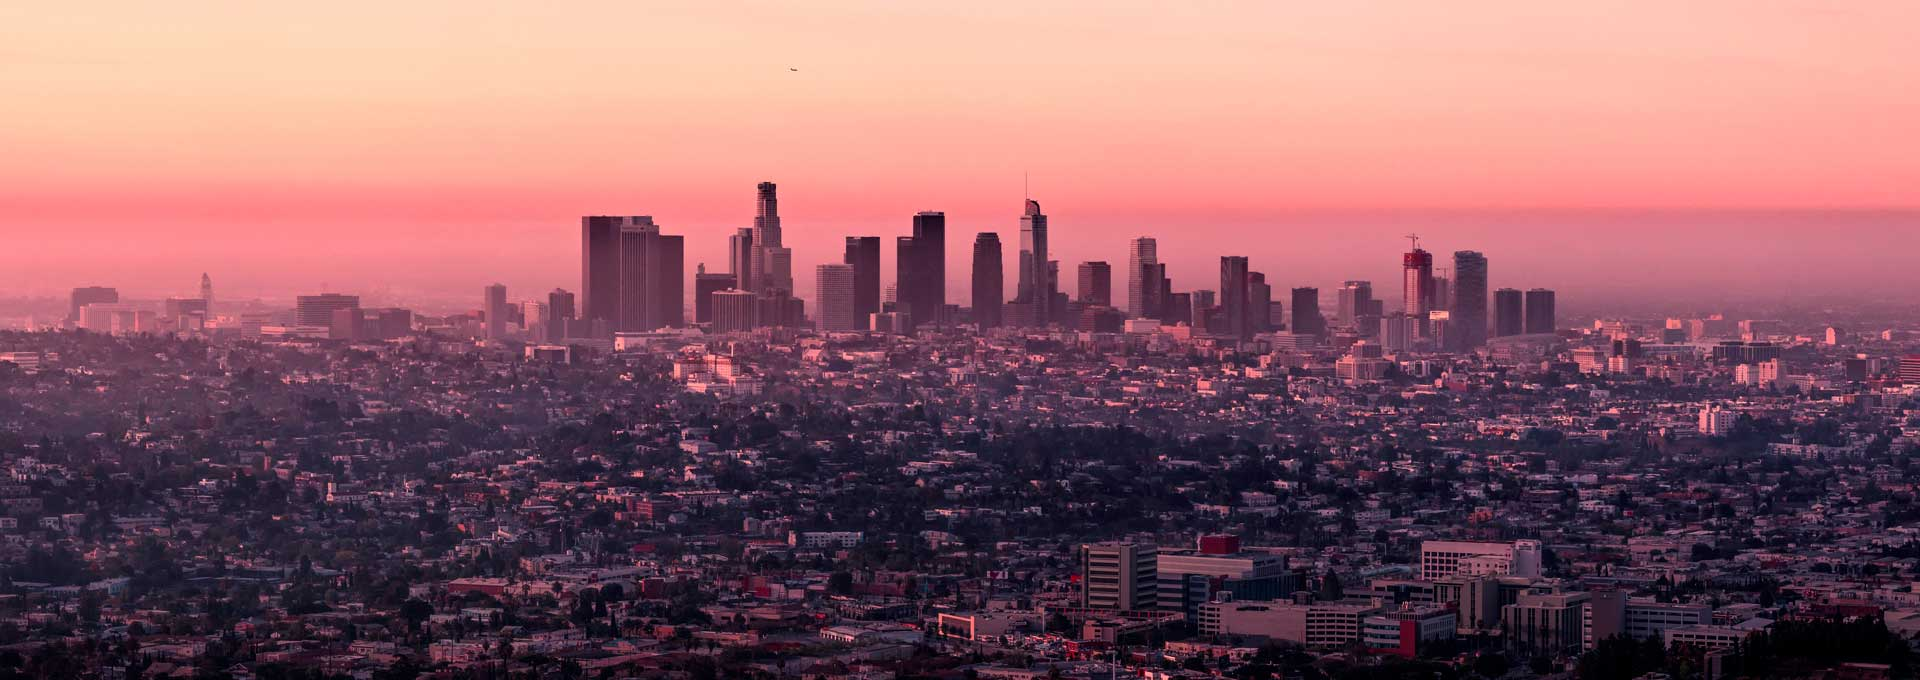


Los Angeles is a city of contrasts, where vibrant neighborhoods and cultural landmarks coexist with complex social issues. With a population of nearly four million people, it's no surprise that LA faces a wide range of criminal activities, from petty thefts to more serious offenses. The sheer diversity of its districts, each with its own unique challenges, makes it imperative to approach crime prevention with a data-driven strategy.

Our role is to delve into the crime data, dissecting it to uncover hidden trends and correlations. By examining when, where, and how crimes occur, we can provide the LAPD with actionable insights. This analysis will empower law enforcement to not only respond to incidents more efficiently but also to anticipate potential crime hotspots and deploy resources preemptively.

Whether it's identifying patterns in burglary rates across different neighborhoods, understanding the timing of certain crimes, or analyzing the demographics of victims and offenders, our analysis will be a vital tool in shaping the future of public safety in Los Angeles. Together, we can contribute to making LA a safer place for all its residents and visitors.

## The Data

 Los Angeles Police Department (LAPD) have provided us with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##crimes = pd.read_csv("Crimes2020.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes = pd.read_csv("Crime_Data2020.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

def clean_data(df):
    # Drop rows where critical columns are NaN
    df = df.dropna(subset=["DR_NO", "Date Rptd", "DATE OCC"])
    
    # Convert date columns to datetime
    df.loc[:, "Date Rptd"] = pd.to_datetime(df["Date Rptd"], errors='coerce')
    df.loc[:, "DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors='coerce')

    # Strip any extra whitespace from TIME OCC
    df.loc[:, "TIME OCC"] = df["TIME OCC"].str.strip()
    
    return df

crimes = clean_data(crimes)
crimes.head(10)


C:\Users\terec\AppData\Local\Temp\ipykernel_9220\2039762298.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv("Crime_Data2020.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
C:\Users\terec\AppData\Local\Temp\ipykernel_9220\2039762298.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv("Crime_Data2020.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})


DR_NO  Date Rptd   DATE OCC TIME OCC  AREA  AREA NAME  Rpt Dist No  \
0  190326475 2020-03-01 2020-03-01     2130     7   Wilshire          784   
1  200106753 2020-02-09 2020-02-08     1800     1    Central          182   
2  200320258 2020-11-11 2020-11-04     1700     3  Southwest          356   
3  200907217 2023-05-10 2020-03-10     2037     9   Van Nuys          964   
4  220614831 2022-08-18 2020-08-17     1200     6  Hollywood          666   
5  231808869 2023-04-04 2020-12-01     2300    18  Southeast         1826   
6  230110144 2023-04-04 2020-07-03     0900     1    Central          182   
7  220314085 2022-07-22 2020-05-12     1110     3  Southwest          303   
8  231309864 2023-04-28 2020-12-09     1400    13     Newton         1375   
9  211904005 2020-12-31 2020-12-31     1220    19    Mission         1974   

   Part 1-2  Crm Cd                               Crm Cd Desc  ... Status  \
0         1     510                          VEHICLE - STOLEN  ...     AA   
1         1     330                     BURGLARY FROM VEHICLE  ...     IC   
2         1     480                             BIKE - STOLEN  ...     IC   
3         1     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...     IC   
4         2     354                         THEFT OF IDENTITY  ...     IC   
5         2     354                         THEFT OF IDENTITY  ...     IC   
6         2     354                         THEFT OF IDENTITY  ...     IC   
7         2     354                         THEFT OF IDENTITY  ...     IC   
8         2     354                         THEFT OF IDENTITY  ...     IC   
9         2     624                  BATTERY - SIMPLE ASSAULT  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0  Adult Arrest    510.0    998.0       NaN      NaN   
1   Invest Cont    330.0    998.0       NaN      NaN   
2   Invest Cont    480.0      NaN       NaN      NaN   
3   Invest Cont    343.0      NaN       NaN      NaN   
4   Invest Cont    354.0      NaN       NaN      NaN   
5   Invest Cont    354.0      NaN       NaN      NaN   
6   Invest Cont    354.0      NaN       NaN      NaN   
7   Invest Cont    354.0      NaN       NaN      NaN   
8   Invest Cont    354.0      NaN       NaN      NaN   
9   Invest Cont    624.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  
5   9900    COMPTON                      AV          NaN  33.9467 -118.2463  
6   1100 S  GRAND                        AV          NaN  34.0415 -118.2620  
7   2500 S  SYCAMORE                     AV          NaN  34.0335 -118.3537  
8   1300 E  57TH                         ST          NaN  33.9911 -118.2521  
9   9000    CEDROS                       AV          NaN  34.2336 -118.4535  

[10 rows x 28 columns]

In [2]:
# Extract hour from TIME OCC and convert to integer
crimes['Hour OCC'] = crimes['TIME OCC'].str.zfill(4).str[:2].astype(int)

# Find the hour with the highest frequency of crimes
peak_crime_hour = crimes['Hour OCC'].mode()[0]
print(f"Peak crime hour : {peak_crime_hour}")


Peak crime hour : 12


To gain a clearer understanding of how crime numbers vary throughout the day, we'll create a visualization that illustrates this relationship. We opted to use a color gradient inspired by the sun's cycle to represent the number of crimes per hour.

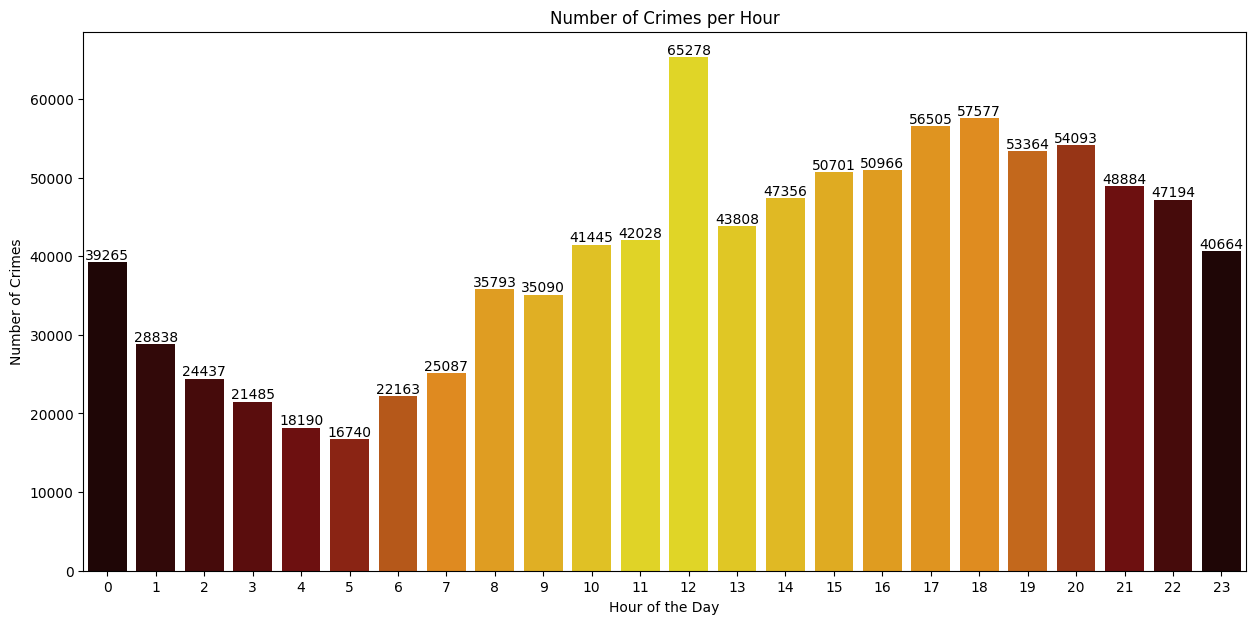

In [3]:
import matplotlib.colors as mcolors

# Extract hour from TIME OCC and convert to integer
crimes['Hour OCC'] = crimes['TIME OCC'].str.zfill(4).str[:2].astype(int)

# Compute the number of crimes per hour
hourly_crime_counts = crimes['Hour OCC'].value_counts().sort_index().reset_index()
hourly_crime_counts.columns = ['Hour', 'Number of Crimes']

# Define a custom color map with a darker orange near 0 and brightest in the center
cmap = mcolors.LinearSegmentedColormap.from_list(
    'sun_gradient',
    [(0,"#230202"),(0.20, 'darkred'), (0.30, 'darkorange'), (0.5, '#fff909'), (0.70, 'orange'), (0.80, 'darkorange'), (0.90, 'darkred'),(1,"#230202")]
)

# Normalize the hour values for coloring
norm = plt.Normalize(hourly_crime_counts['Hour'].min(), hourly_crime_counts['Hour'].max())

# Generate colors from the color map
colors = cmap(np.linspace(0, 1, 24))

# Map colors to hours
hourly_crime_counts['Color'] = [colors[hour] for hour in hourly_crime_counts['Hour']]

# Plot the number of crimes per hour with the custom color gradient
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(x='Hour', 
                       y='Number of Crimes', 
                       data=hourly_crime_counts, 
                       palette=hourly_crime_counts['Color'].tolist(), hue='Hour',
                       dodge=False)

# Add numbers on bars
for index, value in enumerate(hourly_crime_counts['Number of Crimes']):
    bar_plot.text(index, value + 1, int(value), ha='center', va='bottom')

plt.title('Number of Crimes per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')

plt.legend([], [], frameon=False)# Remove the legend if it appears

plt.show()

## 2. Area with Most Night Crimes

To identify the area with the highest frequency of night-time crimes, we'll focus on incidents occurring between 10 PM and 3:59 AM. By filtering the data to include only these night hours, we can analyze and pinpoint the area with the most frequent occurrences of such crimes. This analysis will provide valuable insights into locations with elevated night-time criminal activity, helping to direct resources and interventions effectively.

In [4]:
# Define the range for night crimes (10pm to 3:59am)
night_hours = list(range(22, 24)) + list(range(0, 4))

# Filter the crimes that occurred during night hours
night_crimes = crimes[crimes['Hour OCC'].isin(night_hours)]

# Find the area with the largest frequency of night crimes
peak_night_crime_location = night_crimes['AREA NAME'].mode()[0]
print(f"Peak night crime location: {peak_night_crime_location}")

Peak night crime location: Central


In [5]:
import geopandas as gpd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define mappings for descent and sex
descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

sex_mapping = {
    'F': 'Female',
    'M': 'Male',
    'X': 'Unknown'
}


month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Load and format the dataset
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'], errors='coerce')
crimes['TIME OCC'] = crimes['TIME OCC'].str.strip().str.zfill(4)  # Ensure time is in HHMM format

# Format the datetime as dd.mm.yyyy HH:MM
crimes['DATETIME OCC'] = crimes.apply(
    lambda row: f"{row['DATE OCC'].strftime('%d.%m.%Y')} {row['TIME OCC'][:2]}:{row['TIME OCC'][2:]}", axis=1
)

# Translate the victim descent and sex
crimes['Vict Descent'] = crimes['Vict Descent'].map(descent_mapping).fillna('Unknown')
crimes['Vict Sex'] = crimes['Vict Sex'].map(sex_mapping).fillna('Unknown')

# Clean up the LOCATION field
crimes['LOCATION'] = crimes['LOCATION'].str.strip().str.replace(r'\s+', ' ', regex=True)

# Extract the year, month and day from the DATE OCC column
crimes['Year'] = crimes['DATE OCC'].dt.year
crimes['Month'] = crimes['DATE OCC'].dt.month
crimes['Day'] = crimes['DATE OCC'].dt.day  


In [7]:
# Convert the GeoDataFrames to DataFrames for Plotly
crimes_gdf = gpd.GeoDataFrame(
    crimes, 
    geometry=gpd.points_from_xy(crimes['LON'], crimes['LAT']),
    crs="EPSG:4326"  # Assuming the coordinates are in WGS84
)
crimes_df = pd.DataFrame(crimes_gdf)

# Load the shapefile for Los Angeles
shapefile_path = "LA shapefile data/los-angeles-city-boundary.shp"
la_boundaries = gpd.read_file(shapefile_path)

# Ensure the CRS of the shapefile and crime data are the same
if la_boundaries.crs != crimes_gdf.crs:
    la_boundaries = la_boundaries.to_crs(crimes_gdf.crs)

# Convert the GeoDataFrames to DataFrames for Plotly
boundaries_df = pd.DataFrame(la_boundaries)

# Extract the bounding box of LA for setting map boundaries
min_lon, min_lat, max_lon, max_lat = la_boundaries.total_bounds

# Define buffer percentages to control the extent
lon_buffer_percentage = 0.1541  # buffer for longitude
lat_buffer_percentage = 0.01    # buffer for latitude

# Calculate the buffer in terms of latitude and longitude
lon_buffer = (max_lon - min_lon) * lon_buffer_percentage
lat_buffer = (max_lat - min_lat) * lat_buffer_percentage

# Adjust the bounding box by adding the buffer
min_lon -= lon_buffer
max_lon += lon_buffer
min_lat -= lat_buffer
max_lat += lat_buffer

# Calculate the center of the map
center_lat = (min_lat + max_lat) / 2
center_lon = (min_lon + max_lon) / 2

# Define month names mapping for reference
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Define the default value that will not be an option
default_value = 'Please Select'

# Define the widgets for year, month, and day selection
year_widget = widgets.Dropdown(
    options=[option for option in sorted(crimes_df['Year'].unique())],  
    description='Year:',
    value=None  # Default value is not an option
)

month_widget = widgets.Dropdown(
    options=['All'] + [month_names[m] for m in sorted(crimes_df['Month'].unique())],
    description='Month:',
    value=None  # Default value is not an option
)

day_widget = widgets.Dropdown(
    options=['All'],  # Initial options
    description='Day:',
    value=None  # Default value is not an option
)

# Create an Output widget for displaying the map with specific dimensions
map_output = widgets.Output()

# Create a Label widget for showing the crime count
crime_count_label = widgets.Label(value="Crime Count: 0")

# Function to update day widget options based on the selected year and month
def update_day_widget_options(year, month):
    if year is not None:
        if month == 'All':
            filtered_crimes = crimes_df[crimes_df['Year'] == year]
        else:
            # Ensure month number is valid
            month_number = [num for num, name in month_names.items() if name == month]
            if month_number:
                filtered_crimes = crimes_df[(crimes_df['Year'] == year) & (crimes_df['Month'] == month_number[0])]
            else:
                filtered_crimes = crimes_df[crimes_df['Year'] == year]
        
        # Update day widget options based on available days in the filtered data
        day_widget.options = ['All'] + sorted(filtered_crimes['Day'].unique())

# Define a function to update the map based on widget values
def update_map(year, month, day):
    with map_output:
        clear_output(wait=True)
        
        # Check if year and month filters have valid selections
        if year is None or month is None or day is None:
            print("Please select a year, month, and day to display the map.")
            return
        
        # Convert month name back to number for filtering
        month_number = [num for num, name in month_names.items() if name == month]
        
        # Filter data based on widget values
        filtered_crimes = crimes_df[crimes_df['Year'] == year]
        
        if month != 'All' and month_number:
            filtered_crimes = filtered_crimes[filtered_crimes['Month'] == month_number[0]]
        
        # Apply day filter if not 'All'
        if day != 'All':
            filtered_crimes = filtered_crimes[filtered_crimes['Day'] == day]

        # Update crime count label
        crime_count_label.value = f"Crime Count: {len(filtered_crimes)}"
        
        # Create an interactive scatter mapbox plot for crimes
        fig = px.scatter_mapbox(
            filtered_crimes, 
            lat="LAT", 
            lon="LON", 
            hover_name="Crm Cd Desc", 
            hover_data={
                "DATETIME OCC": True, 
                "Vict Descent": True,
                "Vict Age": True,
                "Vict Sex": True,
                "LOCATION": True        
            },
            color_discrete_sequence=["darkred"], 
            height=1000,  # Adjusted height
            width=900,   # Adjusted width
            center={"lat": center_lat, "lon": center_lon},   
        )

        # Add boundaries to the map
        for _, row in boundaries_df.iterrows():
            coords = list(row['geometry'].exterior.coords)
            lon, lat = zip(*coords)  # Unzip into separate lists
            fig.add_scattermapbox(
                lat=lat,
                lon=lon,
                mode='lines',
                line=dict(width=1.5, color='blue'),
                name='LA Boundaries',
                hoverinfo='none' 
            )

        # Set the mapbox style to "open-street-map"
        fig.update_layout(mapbox_style="open-street-map")

        # Set the title and remove the legend
        fig.update_layout(
            title="Locations of crimes in Los Angeles",
            legend=dict(visible=False)  # Hiding the legend
        )

        # Restrict the map to the adjusted bounding box of Los Angeles
        fig.update_layout(
            mapbox=dict(
                center={"lat": center_lat, "lon": center_lon},
                style="open-street-map",
                # Setting the expanded bounding box limits
                bounds=dict(
                    west=min_lon,
                    east=max_lon,
                    south=min_lat,
                    north=max_lat
                )
            )
        )

        # Update hover label appearance
        fig.update_layout(
            hoverlabel=dict(
                bgcolor='rgba(255, 255, 255, 0.8)',  # Background color of the hover panel
                font_color='black',  # Font color of the hover text
                font_size=12  # Font size of the hover text
            )
        )

        # If no data is available, display a blank map
        if filtered_crimes.empty:
            fig.update_layout(title="No Data Available for Selected Filters")

        # Display the updated map
        fig.show()

# Function to handle changes in year and month widgets
def handle_widget_change(change):
    year = year_widget.value
    month = month_widget.value
    day = day_widget.value

    # Reset month and day when year changes
    if change['name'] == 'value' and change['owner'] == year_widget:
        month_widget.value = None
        day_widget.value = None
        day_widget.options = ['All']  # Reset day options
    
    # Reset day when month changes
    if change['name'] == 'value' and change['owner'] == month_widget:
        day_widget.value = None
        day_widget.options = ['All']  # Reset day options
    
    # Update day widget options based on year and month selection
    update_day_widget_options(year_widget.value, month_widget.value)

# Attach observers to update day widget options when year or month changes
year_widget.observe(handle_widget_change, names='value')
month_widget.observe(handle_widget_change, names='value')

# Display widgets and create an interactive output
ui = widgets.VBox([year_widget, month_widget, day_widget, crime_count_label], layout=widgets.Layout(width='800px'))
display(ui, map_output)

# Create an interactive output that updates the map based on widget values
widgets.interactive_output(update_map, {'year': year_widget, 'month': month_widget, 'day': day_widget})

Output()

Output()

## Task 3: Identify the Number of Crimes Committed Against Victims of Different Age Groups

Finally, we will categorize the crimes based on the age groups of the victims. We'll define specific age ranges and count the number of crimes committed against victims within each age group. This analysis will help us understand which age groups are most affected by crimes, providing insights into the demographics of crime victims.

In [25]:
# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column for age group
crimes['Victim Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

# Count the number of crimes for each age group
victim_ages = crimes['Victim Age Group'].value_counts().sort_index()
print(f"Victim ages:\n{victim_ages}")

Victim ages:
Victim Age Group
0-17      6
18-25     8
26-34    18
35-44    12
45-54     8
55-64     5
65+       2
Name: count, dtype: int64


# Conclusion

From our analysis of crime data, we have obtained the following insights:

Peak Crime Hour: The hour with the highest frequency of crimes is 12. This indicates that crimes are most commonly reported around noon, suggesting a possible need for increased vigilance or resources during this time.

Peak Night Crime Location: The area with the largest frequency of night crimes, occurring between 10pm and 3:59am, is Central. This highlights Central as a hotspot for night-time criminal activity, which may require targeted interventions to address safety concerns in this area.

Victim Age Groups: The distribution of crimes among different age groups is as follows:

Ages 0-17: 4,528 crimes
Ages 18-25: 28,291 crimes
Ages 26-34: 47,470 crimes
Ages 35-44: 42,157 crimes
Ages 45-54: 28,353 crimes
Ages 55-64: 20,169 crimes
Ages 65+: 14,747 crimes
This breakdown shows that the age group most affected by crimes is 26-34, with a significantly higher number of incidents compared to other age ranges. Understanding these patterns can inform targeted crime prevention strategies and support services for different age groups.